# `Bank Customer Segmentation (KMeans)`

### Most banks have a large customer base - with different characteristics in terms of age, income, values, lifestyle, and more. Customer segmentation is the process of dividing a customer dataset into specific groups based on shared traits.

### This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc. 

In [56]:
# Importing libraries
import numpy as np
import pandas as pd
from datetime import date
from datetime import datetime
from dateutil.parser import parse
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid')

## Data Info

In [61]:
# Read Dataset
df = pd.read_csv('bank_transactions.csv')
df.sample(20)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
879868,T879869,C7810711,23/11/74,M,MUMBAI,25632.23,8/9/16,220439,684.60
552356,T552357,C7737092,14/1/91,M,BANGALORE,20342.41,23/8/16,192620,816.00
399524,T399525,C5141480,1/11/67,M,NAVI MUMBAI,941037.00,18/8/16,133532,1981.00
870523,T870524,C3533453,18/4/88,M,REWARI,2370.82,8/9/16,181023,350.03
388450,T388451,C4731883,11/3/96,F,HYDERABAD,13754.19,13/8/16,180548,1012.00
260025,T260026,C1012322,NaN,M,NEW DELHI,152491.04,12/8/16,153807,472.82
499413,T499414,C5928730,17/7/65,M,THANE,37130.99,19/8/16,121215,1091.00
761274,T761275,C6816212,20/1/80,F,GURGAON,35315.86,1/9/16,173633,450.00
853575,T853576,C5830053,19/2/79,M,KALYAN EAST,48550.78,9/9/16,222735,950.00
445222,T445223,C7442191,2/2/80,M,RUDRAPUR,20458.57,16/8/16,145736,11.50


## EDA

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [63]:
# Check Duplication
df.duplicated().sum()

0

In [64]:
# Drop usless Columns
df.drop(['TransactionID' , 'CustLocation'] , axis = 1 , inplace = True )

In [65]:
# Drop nan Values
df.dropna(inplace=True,axis=0)

## EDA and Cleaning

In [66]:
# Being sure that all records begin by C
filtered_df = df[~df['CustomerID'].str.startswith('C')]

In [67]:
# Being sure that all records have same length
filtered_df = df[df['CustomerID'].str.len() > 8]

In [68]:
filtered_df = df[df['CustomerID'].str.len() < 8]

In [69]:
# Removing "C" from the ID
df['CustomerID'] = df['CustomerID'].str.replace('C', '')

In [37]:
# Convert the CustomerDOB column to datetime objects
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

## Feature Engineering

In [41]:
def Age(dob):
    # Get the current year
    current_year = date.today().year

    # Calculate the age
    age = current_year - dob.year - 2
    return age


df['Age'] = df['CustomerDOB'].apply(Age)
df.head()

,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
0,5841053,1994-10-01,F,17819.05,2/8/16,143207,25.0,27.0
1,2142763,2057-04-04,M,2270.69,2/8/16,141858,27999.0,-36.0
2,4417068,1996-11-26,F,17874.44,2/8/16,142712,459.0,25.0
3,5342380,1973-09-14,F,866503.21,2/8/16,142714,2060.0,48.0
4,9031234,1988-03-24,F,6714.43,2/8/16,181156,1762.5,33.0


### Note :
> There are many negative values in Age

In [43]:
# Check how many records have this problem
df[df['Age']<0]

,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age
1,2142763,2057-04-04,M,2270.69,2/8/16,141858,27999.00,-36.0
5,1536588,2072-08-10,F,53609.20,2/8/16,173940,676.00,-51.0
15,8334633,2068-10-07,F,1283.12,1/8/16,125725,250.00,-47.0
30,7648712,2067-01-21,F,298461.05,3/8/16,160642,500.00,-46.0
51,6637047,2066-07-25,M,9956.49,5/8/16,133141,145.00,-45.0
...,...,...,...,...,...,...,...,...
1048506,3333984,2070-09-20,M,41.82,18/9/16,182310,878.18,-49.0
1048510,3429427,2048-07-15,M,416244.74,18/9/16,184959,1695.00,-27.0
1048536,2939947,2033-05-10,M,92173.35,18/9/16,184556,1319.04,-12.0
1048544,3712582,2071-05-10,M,25414.52,18/9/16,182015,400.00,-50.0


In [72]:
# Getting the year of customer's date of birth
df['dob'] = df['CustomerDOB'].apply(lambda x: '19'+ x.split('/')[2])

In [73]:
df

,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),dob
0,5841053,10/1/94,F,17819.05,2/8/16,143207,25.0,1994
1,2142763,4/4/57,M,2270.69,2/8/16,141858,27999.0,1957
2,4417068,26/11/96,F,17874.44,2/8/16,142712,459.0,1996
3,5342380,14/9/73,F,866503.21,2/8/16,142714,2060.0,1973
4,9031234,24/3/88,F,6714.43,2/8/16,181156,1762.5,1988
...,...,...,...,...,...,...,...,...
1048562,8020229,8/4/90,M,7635.19,18/9/16,184824,799.0,1990
1048563,6459278,20/2/92,M,27311.42,18/9/16,183734,460.0,1992
1048564,6412354,18/5/89,M,221757.06,18/9/16,183313,770.0,1989
1048565,6420483,30/8/78,M,10117.87,18/9/16,184706,1000.0,1978


In [76]:
# Calculating Age of customer
def Age(dob):
    # Get the current year
    current_year = date.today().year

    # Calculate the age
    age = current_year - int(dob) - 2
    return age


df['Age'] = df['dob'].apply(Age)
df.head()

,CustomerID,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),dob,Age
0,5841053,10/1/94,F,17819.05,2/8/16,143207,25.0,1994,27
1,2142763,4/4/57,M,2270.69,2/8/16,141858,27999.0,1957,64
2,4417068,26/11/96,F,17874.44,2/8/16,142712,459.0,1996,25
3,5342380,14/9/73,F,866503.21,2/8/16,142714,2060.0,1973,48
4,9031234,24/3/88,F,6714.43,2/8/16,181156,1762.5,1988,33


In [95]:
# Extract Day , Month , Year from TransactionDate
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['Transaction_Day'] = df['TransactionDate'].dt.day
df['Transaction_Month'] = df['TransactionDate'].dt.month
df['Transaction_Year'] = df['TransactionDate'].dt.year

In [97]:
# create dummy variables for the 'gender' column
df = pd.get_dummies(df, columns=['CustGender'],drop_first=True)

In [99]:
# Change Type of Customer ID to numerical
df['CustomerID']=df['CustomerID'].astype('int')

In [112]:
# Check the unique 
df['Transaction_Year'].value_counts()

2016    1041765
Name: Transaction_Year, dtype: int64

In [142]:
# Remove unneeded Columns
df.drop(['CustomerDOB','dob','TransactionDate','TransactionTime','Transaction_Year'],axis=1,inplace=True)

KeyError: "['CustomerDOB', 'dob'] not found in axis"

In [144]:
# Remove unneeded Columns
df.drop(['TransactionDate','TransactionTime','Transaction_Year'],axis=1,inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1041765 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1041765 non-null  int32  
 1   CustAccountBalance       1041765 non-null  float64
 2   TransactionAmount (INR)  1041765 non-null  float64
 3   Age                      1041765 non-null  int64  
 4   Transaction_Day          1041765 non-null  int64  
 5   Transaction_Month        1041765 non-null  int64  
 6   CustGender_M             1041765 non-null  uint8  
 7   CustGender_T             1041765 non-null  uint8  
dtypes: float64(2), int32(1), int64(3), uint8(2)
memory usage: 53.6 MB


<AxesSubplot:>

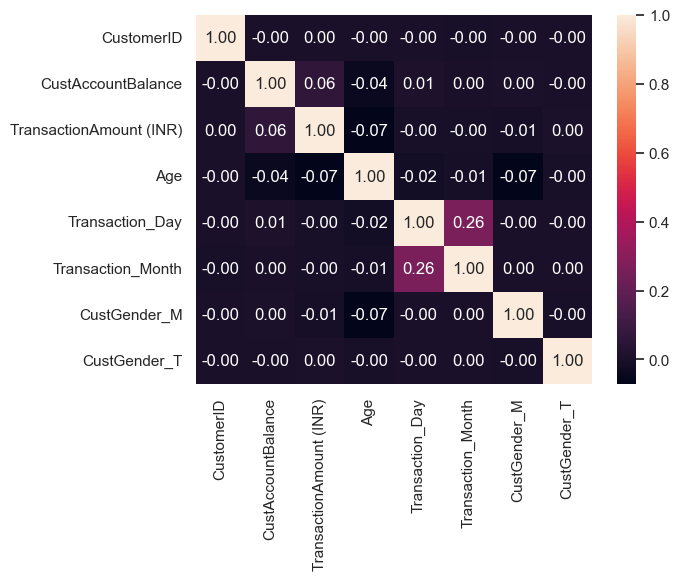

In [146]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

## Modeling with KMeans

In [79]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#from kneed import KneeLocator

###### try with 2 combinations  of features

In [80]:
df1 = df[['Age' , 'CustAccountBalance']]

In [81]:
sclr = StandardScaler()
df1[df1.columns] = sclr.fit_transform(df1[df1.columns])
df1.head()

,Age,CustAccountBalance
0,0.238789,-0.114770
1,0.239651,-0.133134
2,0.238743,-0.114705
3,0.239278,0.887572
4,0.238929,-0.127886


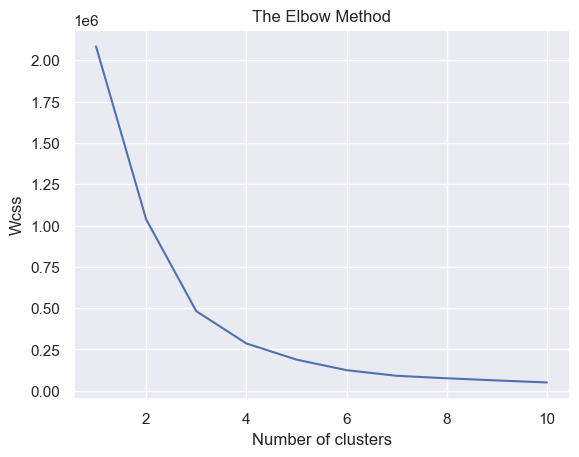

In [82]:
# Elbow method
wcss = []
for k in range(1 , 11):
    Model = KMeans(n_clusters = k, random_state=42)
    Model.fit(df1)
    wcss.append(Model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [83]:
Model = KMeans(n_clusters=3)
Model.fit(df1)
df1 ['Cluster'] = Model.predict(df1)
df1.head()

,Age,CustAccountBalance,Cluster
0,0.238789,-0.114770,0
1,0.239651,-0.133134,0
2,0.238743,-0.114705,0
3,0.239278,0.887572,0
4,0.238929,-0.127886,0


In [84]:
centers = Model.cluster_centers_

In [85]:
print(centers)

[[ 2.39001581e-01 -1.97325542e-02]
 [-4.18407072e+00  1.70891317e-01]
 [-6.71998101e-02  5.67916710e+01]]


<AxesSubplot:xlabel='Age', ylabel='CustAccountBalance'>

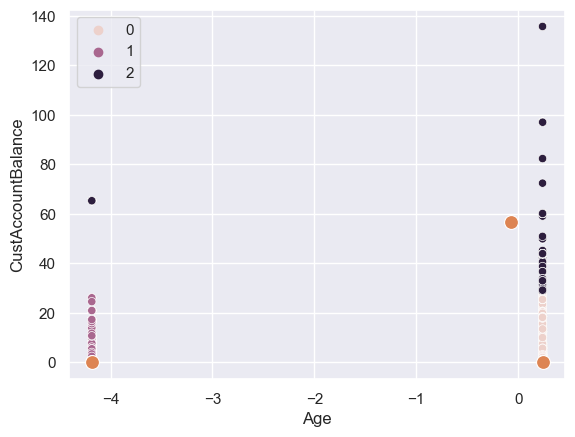

In [87]:
sns.scatterplot(data = df1 , x = 'Age' , y = 'CustAccountBalance' , hue = 'Cluster')
sns.scatterplot(x = centers[ : , 0 ] , y = centers[ : , 1 ] , s = 100  )

In [91]:
# silhouette_score(df1[['CustAccountBalance' , 'Age']],df1['Cluster'])

0.9569948551447998

###### second try cpmbination

In [147]:
df2 = df[['TransactionAmount (INR)' , 'CustAccountBalance']]

In [148]:
scaler = StandardScaler()
df2[df2.columns] = scaler.fit_transform(df2[df2.columns])

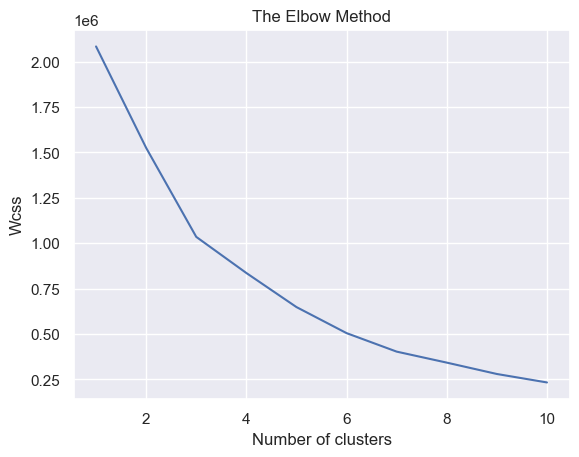

In [149]:
# Elbow method
wcss = []
for k in range(1 , 11):
    Model = KMeans(n_clusters = k, random_state=42)
    Model.fit(df2)
    wcss.append(Model.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wcss')
plt.show()

In [150]:
Model = KMeans(n_clusters = 3)

In [151]:
Model.fit(df2)

KMeans(n_clusters=3)

In [152]:
df2['Cluster'] = Model.predict(df2)

In [153]:
centroids = Model.cluster_centers_

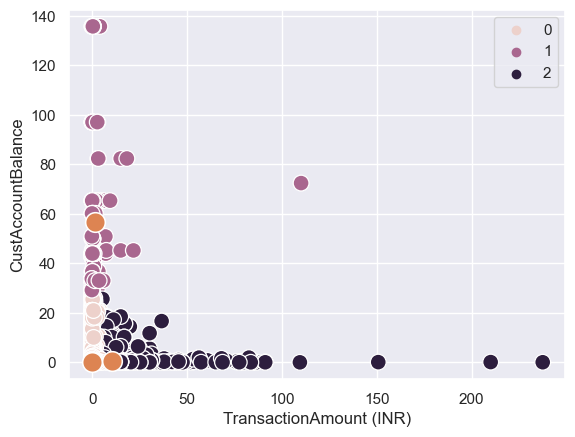

In [154]:
sns.scatterplot(data = df2 , x = 'TransactionAmount (INR)' , y = 'CustAccountBalance' , hue = 'Cluster' , s = 130)
sns.scatterplot(x = centroids[ : , 0] , y = centroids[ : , 1] , s = 200 )
plt.show()

In [155]:
centroids

array([[-4.44709779e-02, -1.13205901e-02],
       [ 1.64910685e+00,  5.67916710e+01],
       [ 1.06291482e+01,  4.44621210e-01]])

In [156]:
# check distribution of clusters
df2.Cluster.value_counts(normalize=True)

0    0.995695
2    0.004139
1    0.000166
Name: Cluster, dtype: float64

#### use whole data to cluster it

In [157]:
df[df.columns] = scaler.fit_transform(df[df.columns])

In [158]:
inertia = []
for k in range(2 , 20):
    Model = KMeans(n_clusters = k)
    Model.fit(df)
    inertia.append(Model.inertia_)

<AxesSubplot:>

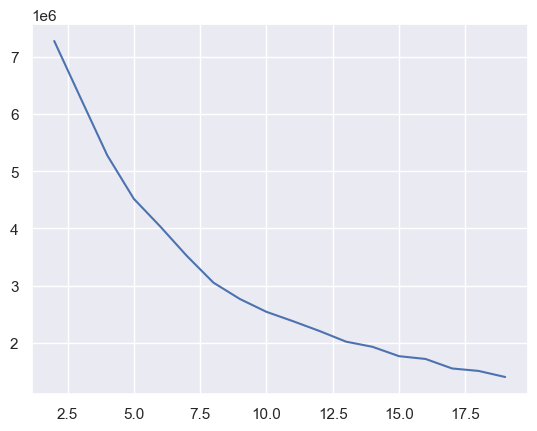

In [159]:
sns.lineplot(x = range(2 , 20) , y = inertia)

In [160]:
Model = KMeans(n_clusters = 8)
Model.fit(df)

KMeans()

In [161]:
df['Cluster'] = Model.predict(df)

In [162]:
# check distribution of clusters
df.Cluster.value_counts(normalize=True)

1    3.245396e-01
2    2.156763e-01
0    2.118165e-01
5    1.911765e-01
4    5.326921e-02
7    3.354883e-03
6    1.660643e-04
3    9.599094e-07
Name: Cluster, dtype: float64